# Problem Set 2 CS174
---
The following problem set will focus on the lessons on Numpy and advanced Python functions. Answer the following guide questions by writing functions or code in cells that accomplish the requirements.

1. Create a function that takes in 3 parameters (integer n, integer a, integer b), and generates an nxn numpy matrix with random values from the range a to b inclusive. **2 pts.**

2. Present a count plot of the top 20 occurring words in **data/networks.txt**. Use the stopword file **data/stop.txt** to filter out the stopwords **2 pts.**

3. Using **data/ateneo.txt** and **data/tl-en.txt**, convert the phrases into straight english phrases. Leave words with no translation be. **6 pts.**

4. Using **data/tl-en.txt**, create a one-to-one English to Filipino translation of your favorite English song. Develop functions to handle pluralities, and multiple entry results. Discuss your code and please put at least 1-liner docs for the functions. **10 pts.**
       
### Bonus:
Repeat #4 but do a Filipino to English translation of your favorite Filipno song. Same specs apply. **5 pts.**

Deadline **Feb 20 11:59PM**. Submission link to be posted in Moodle. 
Submit the .ipynb file only with name <SURNAME>_<ID NUMBER>.ipynb. 
    
Sample: **"BAUTISTA_110464.ipynb"**

# References

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.choice.html, 
https://towardsdatascience.com/very-simple-python-script-for-extracting-most-common-words-from-a-story-1e3570d0b9d0, https://www.azlyrics.com/lyrics/justinbieber/intentions.html

# Libraries

In [1]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
ln = WordNetLemmatizer()
import collections
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 1. NXN Numpy Matrix

In [3]:
size = int(input("Size of your matrix?")) #input for the user
start_limit = int(input("Starting point of matrix values?"))
end_limit = int(input("Ending point of matrix values?"))

def matrix(n,a,b): #function of performing nxn matrix
    random = [x for x in range(a,b)] #randomizing matrix values given with a range
    matrix = np.random.choice(random, n*n, replace = True, p = None) #creation of matrix based from point a to point b; considering range n*n
    matrix.resize(n,n) #resizing the matrix with regards to user
    print(matrix)

matrix(size,start_limit,end_limit) #calling the function

Size of your matrix?3
Starting point of matrix values?2
Ending point of matrix values?10
[[8 4 7]
 [9 2 7]
 [4 9 6]]


# 2. Stopwords Filter

20 most common words in networks.txt
the : 57
to : 56
of : 29
and : 24
is : 23
networks : 20
network : 17
a : 16
users : 16
can : 15
are : 14
on : 13
security : 13
in : 12
for : 11
which : 11
be : 11
this : 10
as : 10
other : 9


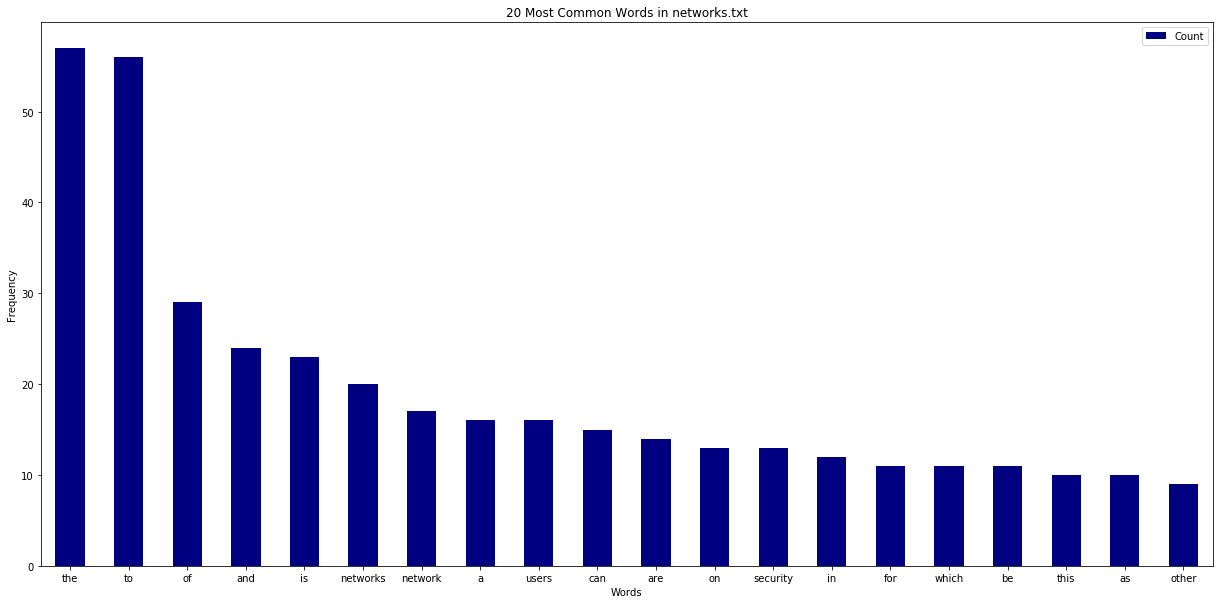

In [38]:
# counter = int(input("How many common words to print?")) //if you want to show an x number of words

def mostCommon(n):
    word_count = {}
    most = []
    count_common = []
    file = open("data/networks.txt","r")
    read = file.read()
    stopwords = set(line.strip() for line in open('data/stop.txt')) #opening stopwords to compare with current list
    
    for word in read.lower().split(): #removing unecessary items in the list
        word = word.replace(".","")
        word = word.replace(",","")
        word = word.replace(":","")
        word = word.replace("\"","")
        word = word.replace("!","")
        if word not in stopwords: #comparing the list with the stopwords that utilizes a checker to compare
            if word not in word_count:
                word_count[word] = 1
            else:
                word_count[word] += 1
    
    print("{} most common words in networks.txt".format(n))
    count = collections.Counter(word_count) #counting the occurences of all the words that weren't in the stopwords
    for word, count in count.most_common(20): #loop that creates the dictionary of both the words(keys) and the count(values).
        most.append(word)
        count_common.append(count)
        print(word, ":", count)
        
    df = pd.DataFrame({'Words':most, 'Count':count_common}) #countplot of the dictionary that shows the count of the words in the file
    ax = df.plot.bar(x='Words', y='Count', rot=0, title = "{} Most Common Words in networks.txt".format(n),colormap='jet')
    plt.rcParams['figure.figsize'] = (21,10)
    ax.set_xlabel("Words")
    ax.set_ylabel("Frequency")
    
mostCommon(20) #change the parameter to counter if you want to show a specific x number of words

# 3. English Translator

In [18]:
word_list = []
english = open("data/tl-en.txt", encoding="utf8")
read_eng = english.read()
hey = read_eng.split() #reads the file and splits it into words
for word in hey:
    word_list.append(word)
word_dictionary = dict(zip(word_list[::2], word_list[1::2])) #converting the text into a list that makes the odd indeces as keys and even indeces as values
print(word_dictionary)

{'ang': 'the', 'mga': 'the', 'ito': 'this', 'noong': 'on', 'may': 'have', 'bilang': 'number', 'hindi': 'not', 'mula': 'from', 'para': 'to', 'siya': 'he', 'kanyang': 'his', 'kung': 'if', 'pilipinas': 'philippines', 'bansang': 'countries', 'pang': 'more', 'din': 'also', 'nito': 'this', 'lalawigan': 'province', 'lungsod': 'cities', 'pag': 'pag', 'panlabas': 'exterior', 'dahil': 'due', 'isa': 'one', 'iba': 'others', 'unang': 'first', 'rin': 'too', 'tao': 'people', 'hapon': 'japanese', 'artista': 'actress', 'italian': 'italian', 'ibang': 'different', 'ika': 'th', 'nang': 'nang', 'taon': 'year', 'kanilang': 'their', 'maaaring': 'may', 'bayan': 'bayan', 'naging': 'became', 'niya': 'him', 'nasa': 'in', 'hanggang': 'until', 'mas': 'mas', 'lamang': 'only', 'sanggunian': 'referencing', 'data': 'data', 'ingles': 'english', 'saan': 'where', 'ayon': 'according', 'style': 'style', 'kay': 'with', 'san': 'san', 'timog': 'south', 'pamamagitan': 'intervention', 'bahagi': 'part', 'png': 'png', 'ilang': 's

In [6]:
def tag_text():
    words = []
    tagalog = open("data/ateneo.txt","r") #reads the text
    read_tag = tagalog.read()
    print("\nOriginal Text:")
    print(read_tag)
    
    for word in read_tag.lower().split(): #removes unecessary items on the list of words
        word = word.replace(".","")
        word = word.replace(",","")
        word = word.replace(":","")
        word = word.replace("\"","")
        word = word.replace("!","")
        words.append(word)
    print("\n List of Words: ")   
    print(words)
    print("\nTranslation:")
    n = []
    for word in words: #translates the words in the list by counter checking with the dictionary provided above
        for k,v in word_dictionary.items():
            ltz = ln.lemmatize(word,'n')
            if ltz.lower()==k:
                n.append(v)
            elif ltz.lower() not in word_dictionary.keys():
                n.append(word)
                break
    print(" ".join(n))
    

tag_text()


Original Text:
"Manong, para lang d'yan sa may side."
"Mej hassle naman this rain."
"Ano, bro? Katip later? G?"
"Wait, I'm like gonna dinner lang with the fambam."
"Which car am I gonna take today kaya?"
"Don't make tusok sa fishball muna, it's not lutong yet."
"Kuya magkano po yung neon balls?"
"Pweds ka ba later?"
"Ugh, there's no parking space pa. Eh, I'm late na nga."
"It's like, super intense talaga. As in grabe."
"I'll make paalam pa. You know naman my dad is strict, eh."
"You're, like, so tagal ha."
"Make it fast lang ha?"
"What's wrong with being conyo ba?"

 List of Words: 
['manong', 'para', 'lang', "d'yan", 'sa', 'may', 'side', 'mej', 'hassle', 'naman', 'this', 'rain', 'ano', 'bro?', 'katip', 'later?', 'g?', 'wait', "i'm", 'like', 'gonna', 'dinner', 'lang', 'with', 'the', 'fambam', 'which', 'car', 'am', 'i', 'gonna', 'take', 'today', 'kaya?', "don't", 'make', 'tusok', 'sa', 'fishball', 'muna', "it's", 'not', 'lutong', 'yet', 'kuya', 'magkano', 'po', 'yung', 'neon', 'balls?'

# 4. Fave Song Translator 

In [39]:
print("\nEng-Tag Dictionary:\n")
reverse = {value:key for key, value in word_dictionary.items()} #reverses the keys and the values of the word_dictionary respectively 
print(reverse) 


Eng-Tag Dictionary:

{'the': 'mga', 'this': 'nito', 'on': 'noong', 'have': 'may', 'number': 'bilang', 'not': 'hinde', 'from': 'mula', 'to': 'para', 'he': 'nya', 'his': 'kanyang', 'if': 'kung', 'philippines': 'philippines', 'countries': 'bansang', 'more': 'pang', 'also': 'din', 'province': 'probinsya', 'cities': 'lungsod', 'pag': 'pag', 'exterior': 'panlabas', 'due': 'due', 'one': 'one', 'others': 'iba', 'first': 'muna', 'too': 'masyadong', 'people': 'tao', 'japanese': 'japanese', 'actress': 'actress', 'italian': 'italyano', 'different': 'ibang', 'th': 'ika', 'nang': 'nang', 'year': 'taon', 'their': 'kanilang', 'may': 'maaaring', 'bayan': 'bayan', 'became': 'naging', 'him': 'kaniya', 'in': 'nasa', 'until': 'hanggang', 'mas': 'mas', 'only': 'lang', 'referencing': 'sanggunian', 'data': 'datos', 'english': 'tagalog', 'where': 'asan', 'according': 'ayon', 'style': 'istilo', 'with': 'kay', 'san': 'san', 'south': 'timog', 'intervention': 'pamamagitan', 'part': 'part', 'png': 'png', 'some': '

In [42]:
print("\nList of Intentions' lyrics:\n")
with open('data/intentions.txt') as file: #opens the file and strips the file by line
    data = [line.rstrip() for line in file]  
print(data)
print("\nLength of the list:",len(data))


List of Intentions' lyrics:

['"Intentions"', '(feat. Quavo)', '', "Picture-perfect, you don't need no filter", "Gorgeous, make 'em drop dead, you a killer", 'Shower you with all my attention', 'Yeah, these are my only intentions', 'Stay in the kitchen, cooking up, got your own bread', "Heart full of equity, you're an asset", "Make sure that you don't need no mentions", 'Yeah, these are my only intentions', '', 'Shout out to your mom and dad for making you', 'Standing ovation, they did a great job raising you', "When I create, you're my muse", 'The kind of smile that makes the news', '', "Can't nobody throw shade on your name in these streets", 'Triple threat, you a boss, you a bae, you a beast', 'You make it easy to choose', "You got a mean touch I can't refuse (No, I can't refuse it)", '', "Picture-perfect, you don't need no filter", "Gorgeous, make 'em drop dead, you a killer", 'Shower you with all my attention', 'Yeah, these are my only intentions', 'Stay in the kitchen, cooking u

In [34]:
def intentions(i):
    translated = []
    removed = []
    for line in i:
        for word in line.lower().split(" "): #removes the unecessary items in the list and removes capitalization
            word = word.replace(".","")
            word = word.replace(",","")
            word = word.replace(":","")
            word = word.replace("\"","")
            word = word.replace("!","")
            word = word.replace("(","")
            word = word.replace(")","")
            ltz = ln.lemmatize(word,'n') #utilizes nltk library to fix pluraties of words in one-to-one conversion;'n' is to find noun
            removed.append(ltz)
            if word in reverse.keys(): #finds the translation of the words in the list and ultimately finds the first one
                translated.append(reverse[word]) #gets the corresponding value of the key found
            else:
                translated.append(word)
    print("\nTranslation of Intentions:\n")            
    print(" ".join(translated))

intentions(data)


Translation of Intentions:

hangarin feat quavo  picture-perfect ikaw don't need wala panala gorgeous gawing 'em drop patay ikaw a killer shower ikaw kay all my atensyon yeah these are my lang hangarin stay nasa mga kusina nagluluto pataas nakuha your sariling tinapay heart buo of equity you're an asset gawing sure yan ikaw don't need wala mentions yeah these are my lang hangarin  shout lumabas para your mom and dad for making ikaw standing ovation nila did a magaling job pagpapalaki ikaw kailan i lumikha you're my muse mga kind of ngiti yan makes mga balita  can't nobody ihagis shade noong your pong nasa these kalye triple banta ikaw a bossing ikaw a bae ikaw a beast ikaw gawing it easy para choose ikaw nakuha a mean hipo i can't refuse wala i can't refuse it  picture-perfect ikaw don't need wala panala gorgeous gawing 'em drop patay ikaw a killer shower ikaw kay all my atensyon yeah these are my lang hangarin stay nasa mga kusina nagluluto pataas nakuha your sariling tinapay heart b

# Bonus

In [13]:
print(word_dictionary)

{'ang': 'the', 'mga': 'the', 'ito': 'this', 'noong': 'on', 'may': 'have', 'bilang': 'number', 'hindi': 'not', 'mula': 'from', 'para': 'to', 'siya': 'he', 'kanyang': 'his', 'kung': 'if', 'pilipinas': 'philippines', 'bansang': 'countries', 'pang': 'more', 'din': 'also', 'nito': 'this', 'lalawigan': 'province', 'lungsod': 'cities', 'pag': 'pag', 'panlabas': 'exterior', 'dahil': 'due', 'isa': 'one', 'iba': 'others', 'unang': 'first', 'rin': 'too', 'tao': 'people', 'hapon': 'japanese', 'artista': 'actress', 'italian': 'italian', 'ibang': 'different', 'ika': 'th', 'nang': 'nang', 'taon': 'year', 'kanilang': 'their', 'maaaring': 'may', 'bayan': 'bayan', 'naging': 'became', 'niya': 'him', 'nasa': 'in', 'hanggang': 'until', 'mas': 'mas', 'lamang': 'only', 'sanggunian': 'referencing', 'data': 'data', 'ingles': 'english', 'saan': 'where', 'ayon': 'according', 'style': 'style', 'kay': 'with', 'san': 'san', 'timog': 'south', 'pamamagitan': 'intervention', 'bahagi': 'part', 'png': 'png', 'ilang': 's

In [30]:
print("\nList of Mabagal's lyrics:\n")
with open('data/mabagal.txt') as song: #opens the file and strips the text of the file per line and stores in into a list
    mabagal = [line.rstrip() for line in song]  
print(mabagal)
print(len(mabagal))


List of Mabagal's lyrics:

['"Mabagal"', '(from "Himig Handog 2019")', '', 'Gusto kitang isayaw ng mabagal', 'Gusto kitang isayaw ng mabagal', 'Hawak kamay, pikit mata', 'Sumasabay sa musika', 'Gusto kitang isayaw ng mabagal', '', 'Heto na', 'Ang kantang', 'Hinihintay natin', 'Eto na ang pagkakataon na', "Sabihin sa'yo", 'Ang nararamdaman ng puso ko', 'Matagal ko nang gustong sabihin ito', '', 'Gusto kitang isayaw ng mabagal', 'Gusto kitang isayaw ng mabagal', 'Hawak kamay, pikit mata', 'Sumasabay sa musika', 'Gusto kitang isayaw ng mabagal', '', "Ilalagay ang 'yong kamay sa'king baywang", 'Isasabay sa tugtog ng kanta ating katawan', 'At dahan-dahang magdidikit ating mga balat', "Matagal ko nang gustong mangyari 'to", '', 'Gusto kitang isayaw ng mabagal', 'Gusto kitang isayaw ng mabagal', 'Hawak kamay (Hawak kamay), pikit mata (pikit mata)', 'Sumasabay (Sumasabay) sa musika', 'Gusto kitang isayaw ng mabagal', '', 'Pag natapos na (Pag natapos na) ating kanta (ating kanta)', 'At wala na

In [33]:
def mabagal_song(m):
    katumbas = []
    tanggal = []
    for linya in mabagal:
        for salita in linya.lower().split(" "): #removes the unecessary items in the list and removes capitalization
            salita = salita.replace(".","")
            salita = salita.replace(",","")
            salita = salita.replace(":","")
            salita = salita.replace("\"","")
            salita = salita.replace("!","")
            salita = salita.replace("(","")
            salita = salita.replace(")","")
            lm = ln.lemmatize(salita,'n') #utilizes nltk library to fix pluraties of words in one-to-one conversion;'n' is to find noun
            tanggal.append(lm)
            if salita in word_dictionary.keys(): #finds the translation of the words in the list and ultimately finds the first one
                katumbas.append(word_dictionary[salita])#gets the corresponding value of the key found
            else:
                katumbas.append(salita)
    print("\nTranslation of Mabagal:\n")            
    print(" ".join(katumbas))

mabagal_song(mabagal)


Translation of Mabagal:

slow from himig handog 2019  want kitang isayaw ng slow want kitang isayaw ng slow holding hand pikit mata sumasabay sa music want kitang isayaw ng slow  heto na the kantang hinihintay natin eto na the opportunity na sabihin sa'yo the feeling ng heartless ko long ko nang want sabihin this  want kitang isayaw ng slow want kitang isayaw ng slow holding hand pikit mata sumasabay sa music want kitang isayaw ng slow  ilalagay the 'yong hand sa'king waist isasabay sa music ng songs our body at dahan-dahang magdidikit our the skin long ko nang want occur 'to  want kitang isayaw ng slow want kitang isayaw ng slow holding hand holding hand pikit mata pikit mata sumasabay sumasabay sa music want kitang isayaw ng slow  pag expired na pag expired na our songs our songs at no nang music kakantahan ka ng acapella sa'yong headphones at nanamnamin natin the inclusion  want kitang isayaw ng slow holding hand pikit mata sumasabay sa music want kitang isayaw ng slow
